<a href="https://colab.research.google.com/github/bryaanabraham/spam_text_recognition_model/blob/main/SpamTextDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd

Download the dataset from: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [85]:
df = pd.read_csv('spam.csv', encoding='latin1') #we use encoding as the dataset contains charectors which cannot be interpreted

In [86]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True) #inplace is set to true as its a permanent operation

In [89]:
df.sample(10)

,v1,v2
2333,ham,What happen to her tell the truth
350,ham,"Nah can't help you there, I've never had an ip..."
3641,ham,My house here e sky quite dark liao... If rain...
4617,ham,Nvm... I'm going to wear my sport shoes anyway...
2422,ham,A bloo bloo bloo I'll miss the first bowl
4777,ham,U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...
1414,ham,So wats ur opinion abt him and how abt is char...
2893,ham,K...k...yesterday i was in cbe .
686,ham,Every King Was Once A Crying Baby And Every Gr...
3434,ham,\Hi darlin i cantdo anythingtomorrow as mypare...


In [90]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)#inplace is set to true as its a permanent operation
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
#Enumerating target values

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [92]:
df['target'] = encoder.fit_transform(df['target'])

In [93]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [95]:
df.duplicated().sum()

403

In [96]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [97]:
df.shape

(5169, 2)

##Exploratory Data Analysis (EDA)

In [98]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

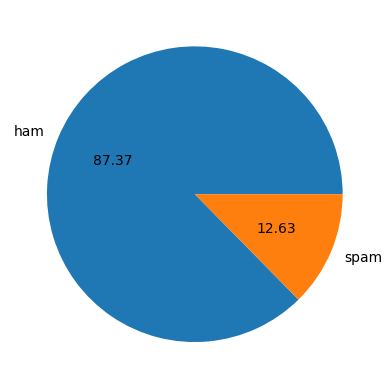

In [99]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [100]:
#Natural language toolkit library
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [101]:
df['num_characters'] = df['text'].apply(len)

In [102]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [103]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [104]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [105]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [106]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [107]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [108]:
#ham texts
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [109]:
#spam texts
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [110]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

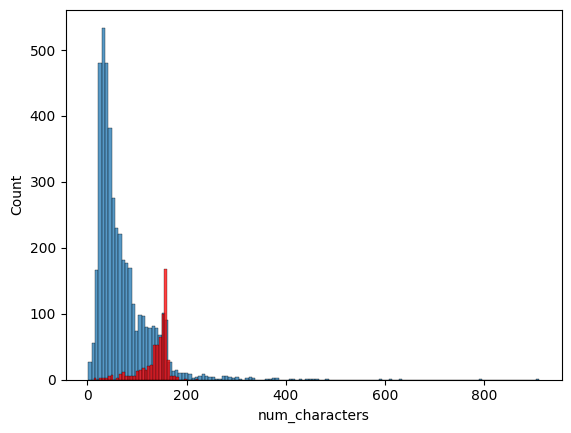

In [111]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

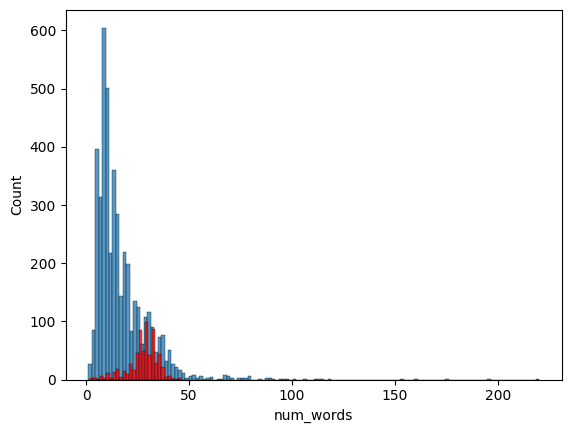

In [112]:
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

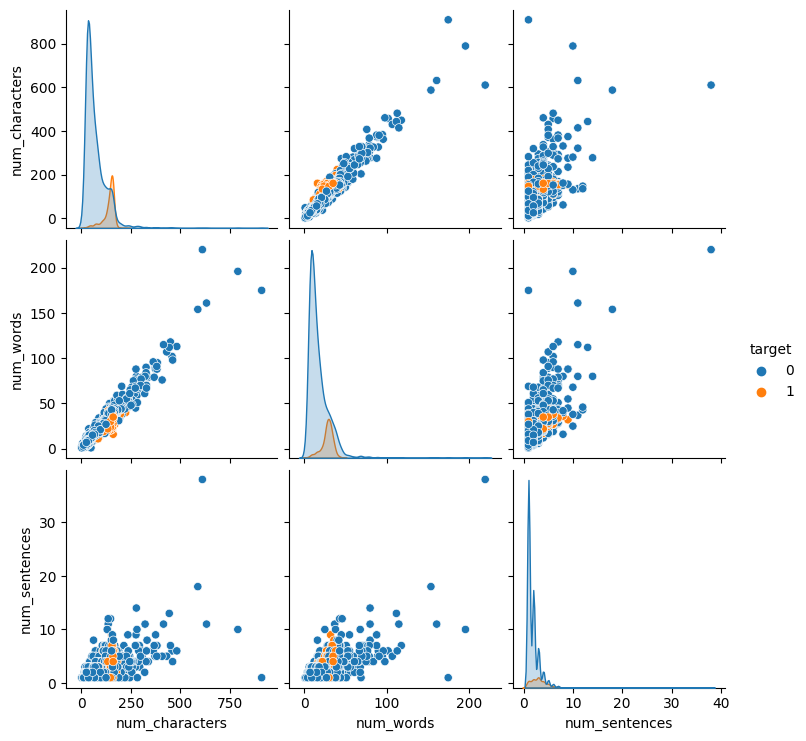

In [113]:
#visualising relations between attributes
sns.pairplot(df,hue='target')

<ipython-input-114-87e13218eecd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

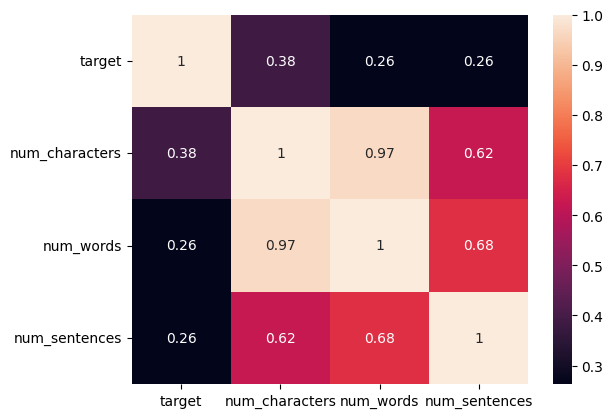

In [114]:
#heat map of CORRelation between attributes with ANNOTations shown
sns.heatmap(df.corr(),annot=True)

###Text Preprocessing

In [115]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [116]:
def transform_text(text):
  text = text.lower() #converting all chars to lower case
  text = nltk.word_tokenize(text) #converting the text (single string) to a list of strings containing individual words

  #discarding all special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  #discarding all stopwords and punctuation characters
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  #reducing all words to their root form
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y) #converted to one string

In [117]:
transform_text(df['text'][0])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat go until jurong point crazi avail onli in bugi n great world la e buffet cine there got amor wat'

In [118]:
df['transformed_text'] = df['text'].apply(transform_text)

In [119]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say u dun say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though nah i d...


In [120]:
!pip install wordcloud

In [121]:
#to identify the most used words and show them pictorally
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [122]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

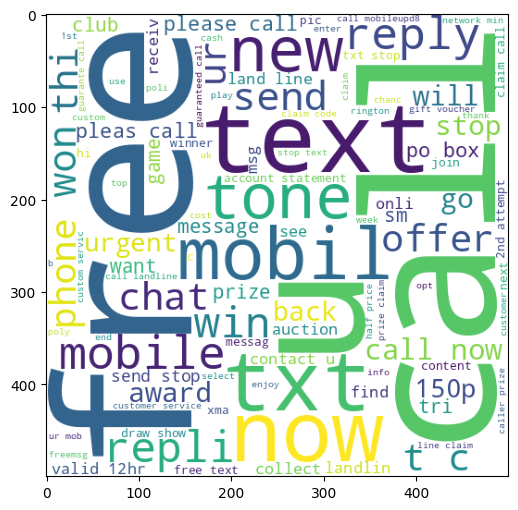

In [123]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [124]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

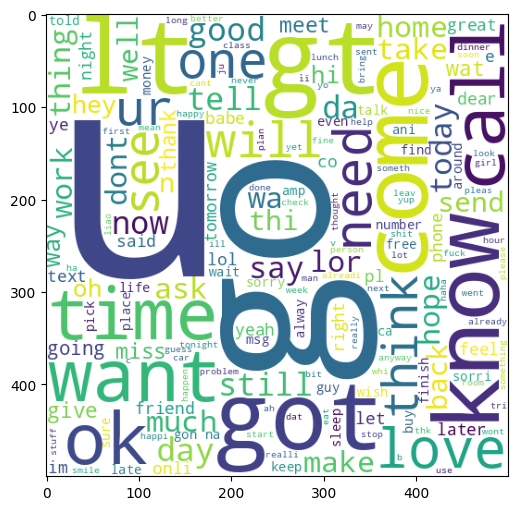

In [125]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [126]:
spam_corpus = []

for i in df[df['target']==1]['transformed_text'].tolist():
  for word in i.split():
    spam_corpus.append(word)

In [127]:
from collections import Counter

In [128]:
Counter(spam_corpus).most_common(30)

[('call', 622),
 ('to', 595),
 ('free', 382),
 ('a', 330),
 ('2', 310),
 ('txt', 271),
 ('you', 267),
 ('your', 252),
 ('u', 238),
 ('ur', 238),
 ('text', 226),
 ('stop', 208),
 ('claim', 194),
 ('4', 194),
 ('for', 183),
 ('the', 183),
 ('now', 164),
 ('prize', 163),
 ('or', 157),
 ('is', 144),
 ('get', 144),
 ('new', 128),
 ('from', 122),
 ('on', 121),
 ('send', 118),
 ('have', 116),
 ('mobil', 114),
 ('urgent', 114),
 ('nokia', 111),
 ('contact', 107)]

In [129]:
ham_corpus = []

for i in df[df['target']==1]['transformed_text'].tolist():
  for word in i.split():
    ham_corpus.append(word)

In [130]:
Counter(ham_corpus).most_common(30)

[('call', 622),
 ('to', 595),
 ('free', 382),
 ('a', 330),
 ('2', 310),
 ('txt', 271),
 ('you', 267),
 ('your', 252),
 ('u', 238),
 ('ur', 238),
 ('text', 226),
 ('stop', 208),
 ('claim', 194),
 ('4', 194),
 ('for', 183),
 ('the', 183),
 ('now', 164),
 ('prize', 163),
 ('or', 157),
 ('is', 144),
 ('get', 144),
 ('new', 128),
 ('from', 122),
 ('on', 121),
 ('send', 118),
 ('have', 116),
 ('mobil', 114),
 ('urgent', 114),
 ('nokia', 111),
 ('contact', 107)]

##Naive Bayes
Naive Bayes is generally used for text based models
We use count vectorizer to convert the text into numbers while retaining maximum information

In [131]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [132]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [133]:
X.shape

(5169, 10067)

In [134]:
y = df['target'].values

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [137]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [138]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [139]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9061895551257253
[[818  78]
 [ 19 119]]
0.6040609137055838


In [140]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[863  33]
 [  9 129]]
0.7962962962962963


In [141]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9680851063829787
[[890   6]
 [ 27 111]]
0.9487179487179487


Using Tfidf Vectorizer to see if it increases the performance

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [144]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [145]:
X.shape

(5169, 3000)

In [146]:
y = df['target'].values

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [149]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [150]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [151]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8800773694390716
[[793 103]
 [ 21 117]]
0.5318181818181819


In [152]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[896   0]
 [ 24 114]]
1.0


In [153]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9816247582205029
[[892   4]
 [ 15 123]]
0.968503937007874


Since mnb model with tfidf gives a precision score of 1, we will go forward with this model

##More models

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [157]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [158]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9806576402321083, 0.9836065573770492)

In [159]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  KN
Accuracy -  0.90715667311412
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  1.0
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9613152804642167
Precision -  0.9711538461538461
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9734513274336283
For  AdaBoost
Accuracy -  0.9671179883945842
Precision -  0.90625
For  BgC
Accuracy -  0.965183752417795
Precision -  0.8984375
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9584139264990329
Precision -  0.9439252336448598
For  xgb
Accuracy -  0.9845261121856866
Precision -  0.9841269841269841


In [161]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision', ascending=False)

In [163]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.907157,1.000000
2,NB,0.976789,1.000000
10,xgb,0.984526,0.984127
0,SVC,0.980658,0.983607
8,ETC,0.978723,0.983333
5,RF,0.970019,0.973451
4,LR,0.961315,0.971154
9,GBDT,0.958414,0.943925
6,AdaBoost,0.967118,0.906250
7,BgC,0.965184,0.898438


Naive Bayes still gives the best output given the max features is set to 3000

###Voting classifiers to combine the performance of different models

In [166]:
from sklearn.ensemble import VotingClassifier

In [172]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb', mnb), ('et', etc)], voting='hard')

In [174]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm', SVC(gamma=1.0, kernel='sigmoid')),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))])

In [175]:
y_pred = voting.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))

Accuracy:  0.9825918762088974
Precision:  1.0


In [207]:
def classify_text(text):
  text = transform_text(text)
  vector_input = tfidf.transform([text])
  result = mnb.predict(vector_input)[0]

  if result == 1:
    print("Spam message")
  else:
    print("Not a spam Message")

In [211]:
text1 = 'I recieved your message regarding the electricity bill, i will settle all dues ASAP'
text2 = 'Free entry in 2 a weekly competition to win FA Cup final ticktes. Text FA to 87121 to receive'

In [212]:
classify_text(text1)

Not a spam Message


In [213]:
classify_text(text2)

Spam message
